### Time Series Analysis and Forecasting 
Forecasting for the next 6 weeks 

In [24]:
import os
import pandas as pd

# data visualization
import matplotlib.pyplot as plt

In [25]:
# setting the raw path
raw_data_path = os.path.join(os.path.pardir,"data","processed")
train_file_path = os.path.join(raw_data_path,"processed_train_store_df.csv")

In [26]:
train_store = pd.read_csv(train_file_path)

In [27]:
train_store[["Store","StoreType"]]

,Store,StoreType
0,1,c
1,1,c
2,1,c
3,1,c
4,1,c
...,...,...
844333,292,a
844334,292,a
844335,292,a
844336,292,a


In [28]:
# sales for the store number 1 (StoreType C)
sales_store_c = train_store[train_store.Store == 1].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales_store_c = sales_store_c.sort_index(ascending = False)

# to datetime64
sales_store_c['Date'] = pd.DatetimeIndex(sales_store_c['Date'])

In [29]:
#renaming the columns
sales_store_c = sales_store_c.rename(columns = {'Date': 'date_c',
                                'Sales': 'sales_c'})
sales_store_c.head()

,date_c,sales_c
780,2013-01-02,5530
779,2013-01-03,4327
778,2013-01-04,4486
777,2013-01-05,4997
776,2013-01-07,7176


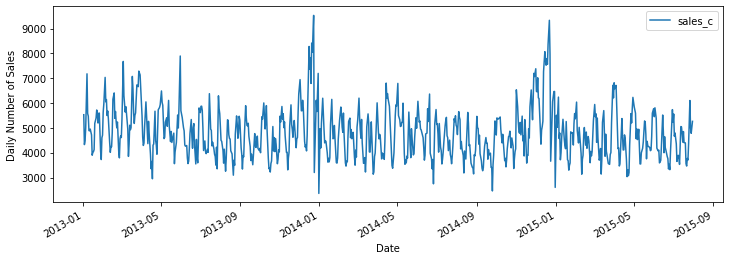

In [30]:
ax = sales_store_c.set_index('date_c').plot(figsize = (12, 4))
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

### Modelling Holidays

In [33]:
# create holidays dataframe
state_datess = train_store[(train_store.StateHoliday == 'a') | (train_store.StateHoliday == 'b') & 
                          (train_store.StateHoliday == 'c')].loc[:, 'Date'].values
school_datess = train_store[train_store.SchoolHoliday == 1].loc[:, 'Date'].values

states = pd.DataFrame({'holiday': 'state_holiday',
                      'days': pd.to_datetime(state_datess)})
schools = pd.DataFrame({'holiday': 'school_holiday',
                      'days': pd.to_datetime(school_datess)})

holidayss = pd.concat((states, schools))      
holidayss.head()

,holiday,days
0,state_holiday,2014-10-03
1,state_holiday,2013-10-03
2,state_holiday,2015-06-04
3,state_holiday,2014-06-19
4,state_holiday,2013-05-30


In [38]:
!pip install fbprophet

  Using cached fbprophet-0.6.tar.gz (54 kB)
  Using cached cmdstanpy-0.4.0-py3-none-any.whl (22 kB)
  Using cached pystan-2.19.1.1-cp37-cp37m-win_amd64.whl (79.8 MB)


ERROR: Could not install packages due to an EnvironmentError: [Errno 28] No space left on device



In [37]:
from fbprophet import Prophet
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width = 0.95, 
                   holidays = holidays)
my_model.fit(sales_store_c)

# dataframe that extends into future 6 weeks 
future_dates = my_model.make_future_dataframe(periods = 6*7)

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['days', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [ ]:
fc = forecast[['days', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

In [ ]:
# visualizing predicions
my_model.plot(forecast);